Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [[271.5]
 [300. ]
 [509.8]
 [394. ]
 [540. ]]
The shape of x_train is: (100, 4)
The shape of y_train is: (100, 1)
Number of training examples (m): 100


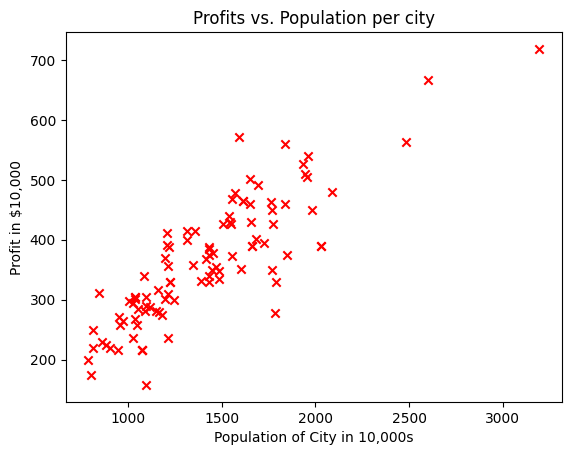

Cost at initial w: 7102409.206744001
Gradient at initial w, b (zeros): [[-5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.48850468e+05 -5.48850468e+05 -5.48850468e+05 -5.48850468e+05
  -5.

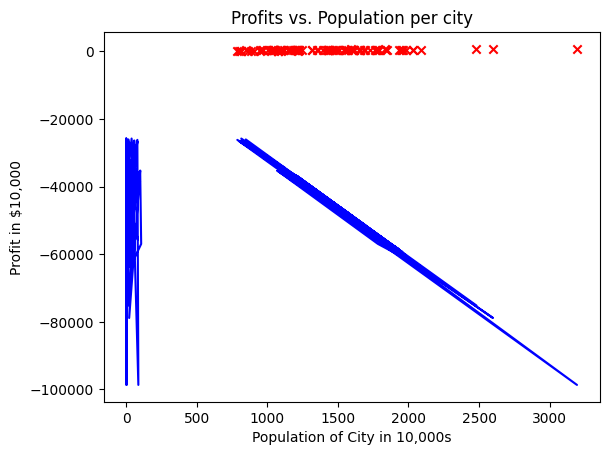

In [70]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

def load_data():
    data = np.genfromtxt('https://raw.githubusercontent.com/jxareas/Machine-Learning-Notebooks/master/1_Supervised_Machine_Learning/Week%202.%20Regression%20with%20multiple%20input%20variables/data/houses.txt', delimiter=',')
    x = data[:, :-1]
    y = data[:, -1:]
    return x, y

x_train, y_train = load_data()

print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training examples (m):', len(x_train))

plt.scatter(x_train[:, 0], y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

def compute_cost(x, y, w, b):
    m = x.shape[0]
    h = np.dot(x, w) + b
    cost = np.sum((h - y) ** 2) / (2 * m)
    return cost

initial_w = np.zeros(x_train.shape[1])

initial_b = 0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w:', cost)

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    h = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (h - y)) / m
    dj_db = np.sum(h - y) / m
    return dj_dw, dj_db

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

iterations = 1500
alpha = 0.01

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.zeros((x.shape[1], 1))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw_i = 2 * x[i].reshape(-1, 1) * (f_wb - y[i])
        dj_db_i = 2 * (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db
print("w, b found by gradient descent:", w, b)

m = x_train.shape[0]
predicted = np.dot(x_train, w) + b

plt.plot(x_train, predicted, c="b")
plt.scatter(x_train[:, 0], y_train.reshape(-1), marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
predict1 = 3.5 * w[0] + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))

predict2 = 7.0 * w[0] + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2 * 10000))

In [68]:
predict1 = 3.5 * w[0] + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1 * 10000))

predict2 = 7.0 * w[0] + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2))

For population = 35,000, we predict a profit of $-1500000.00
For population = 70,000, we predict a profit of $-255.00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [[271.5]
 [300. ]
 [509.8]
 [394. ]
 [540. ]]
The shape of x_train is: (100, 4)
The shape of y_train is: (100, 1)
Number of training examples (m): 100


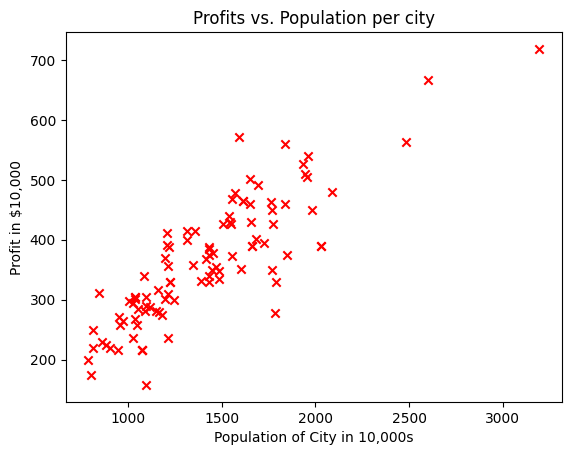

Cost at initial w: 17500.0
Gradient at initial w, b (zeros): 20000.0 30000.0


NameError: ignored

In [1]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

def load_data():
    data = np.genfromtxt('https://raw.githubusercontent.com/jxareas/Machine-Learning-Notebooks/master/1_Supervised_Machine_Learning/Week%202.%20Regression%20with%20multiple%20input%20variables/data/houses.txt', delimiter=',')
    x = data[:, :-1]
    y = data[:, -1:]
    return x, y

x_train, y_train = load_data()

print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

print('The shape of x_train is:', x_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training examples (m):', len(x_train))

plt.scatter(x_train[:, 0], y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###  
     ### START CODE HERE ###  
    # Variable to keep track of sum of cost from each example
    cost_sum = 0

    # Loop over training examples
    for i in range(m):
        # Your code here to get the prediction f_wb for the ith example
        f_wb = 10000
        # Your code here to get the cost associated with the ith example
        cost = 35000

        # Add to sum of cost for each example
        cost_sum = cost_sum + cost 

    # Get the total cost as the sum divided by (2*m)
    total_cost = (1 / (2 * m)) * cost_sum
    ### END CODE HERE ### 
    ### END CODE HERE ### 

    return total_cost

initial_w = np.zeros(x_train.shape[1])
initial_b = 0

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print('Cost at initial w:', cost)

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):  
        # Your code here to get prediction f_wb for the ith example
        f_wb = 10000

        # Your code here to get the gradient for w from the ith example 
        dj_dw_i = 20000

        # Your code here to get the gradient for b from the ith example 
        dj_db_i = 30000

        # Update dj_db : In Python, a += 1  is the same as a = a + 1
        dj_db += dj_db_i

        # Update dj_dw
        dj_dw += dj_dw_i

    # Divide both dj_dw and dj_db by m
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    ### END CODE HERE ### 
    ### END CODE HERE ### 
        
    return dj_dw, dj_db
'''

    # Divide both dj_dw and dj_db by m
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    m = x.shape[0]
    h = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (h - y)) / m
    dj_db = np.sum(h - y) / m
    return dj_dw, dj_db
'''
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

iterations = 1500
alpha = 0.01

def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = np.zeros((x.shape[1], 1))
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        dj_dw_i = 2 * x[i].reshape(-1, 1) * (f_wb - y[i])
        dj_db_i = 2 * (f_wb - y[i])

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db
print("w, b found by gradient descent:", w, b)

m = x_train.shape[0]
predicted = np.dot(x_train, w) + b

plt.plot(x_train, predicted, c="b")
plt.scatter(x_train[:, 0], y_train.reshape(-1), marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
